In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce

Read all the worksheets from the data excel file

In [13]:
orders_df = pd.read_excel('../data/Muesli Project raw data - group 3.xlsx', header=1, sheet_name=0)
campaign_data_df = pd.read_excel('../data/Muesli Project raw data - group 3.xlsx', sheet_name=1)
order_process_data_df = pd.read_excel('../data/Muesli Project raw data - group 3.xlsx', sheet_name=2)
interndata_study_df = pd.read_excel('../data/Muesli Project raw data - group 3.xlsx', sheet_name=3)

Check the headers of the DataFrames

In [14]:
dataframes = [orders_df,
              campaign_data_df,
              order_process_data_df,
              interndata_study_df
              ]

for df in dataframes:
    print(df.columns)
    print('-' * 30)

Index(['Index', 'Order ID', 'Order Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Origin Channel', 'Country/Region', 'City', 'State',
       'Postal Code', 'Region', 'Category', 'Sub-Category', 'Product ID',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')
------------------------------
Index(['Order ID', 'Arrival Scan Date', 'Customer Name'], dtype='object')
------------------------------
Index(['Row ID', 'Order ID', 'Order Date', 'On Truck Scan Date', 'Ship Mode'], dtype='object')
------------------------------
Index(['Order ID', 'Ready to Ship Date', 'Pickup Date'], dtype='object')
------------------------------


Change column names to lower case and snake case.

In [15]:
dataframes = [orders_df,
              campaign_data_df,
              order_process_data_df,
              interndata_study_df
              ]

for df in dataframes:
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.replace(' ', '_')
    print(df.columns)
    print('-' * 30)

Index(['index', 'order_id', 'order_date', 'ship_mode', 'customer_id',
       'customer_name', 'origin_channel', 'country/region', 'city', 'state',
       'postal_code', 'region', 'category', 'sub-category', 'product_id',
       'sales', 'quantity', 'discount', 'profit'],
      dtype='object')
------------------------------
Index(['order_id', 'arrival_scan_date', 'customer_name'], dtype='object')
------------------------------
Index(['row_id', 'order_id', 'order_date', 'on_truck_scan_date', 'ship_mode'], dtype='object')
------------------------------
Index(['order_id', 'ready_to_ship_date', 'pickup_date'], dtype='object')
------------------------------


Delete unneeded columns.

In [16]:
orders_df = orders_df.drop(
                    ['index', 'origin_channel', 'category', 'sub-category'],
                    axis=1)

campaign_data_df = campaign_data_df.drop(
                    ['customer_name'],
                    axis=1)

order_process_data_df = order_process_data_df.drop(
                    ['row_id', 'order_date'],
                    axis=1)

In [17]:
dataframes = [orders_df,
              campaign_data_df,
              order_process_data_df,
              interndata_study_df
              ]

for df in dataframes:
    print(df.columns)
    print('-' * 30)

Index(['order_id', 'order_date', 'ship_mode', 'customer_id', 'customer_name',
       'country/region', 'city', 'state', 'postal_code', 'region',
       'product_id', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')
------------------------------
Index(['order_id', 'arrival_scan_date'], dtype='object')
------------------------------
Index(['order_id', 'on_truck_scan_date', 'ship_mode'], dtype='object')
------------------------------
Index(['order_id', 'ready_to_ship_date', 'pickup_date'], dtype='object')
------------------------------


Check the number of rows and columns.

In [18]:
dataframes = [orders_df,
              campaign_data_df,
              order_process_data_df,
              interndata_study_df
              ]

for df in dataframes:
    print(df.shape)

(9994, 15)
(333, 2)
(5899, 3)
(290, 3)


Check for duplicates.

In [19]:
dataframes = [orders_df,
              campaign_data_df,
              order_process_data_df,
              interndata_study_df
              ]

for df in dataframes:
    print(df.duplicated().value_counts())
    print('---')
    print(df.shape)
    print('-' * 30)

False    9993
True        1
Name: count, dtype: int64
---
(9994, 15)
------------------------------
False    333
Name: count, dtype: int64
---
(333, 2)
------------------------------
False    3003
True     2896
Name: count, dtype: int64
---
(5899, 3)
------------------------------
False    204
True      86
Name: count, dtype: int64
---
(290, 3)
------------------------------


Drop the duplicates.

In [20]:
dataframes = [orders_df,
              campaign_data_df,
              order_process_data_df,
              interndata_study_df
              ]

for df in dataframes:
    df.drop_duplicates(inplace=True)
    print(df.duplicated().value_counts())
    print('---')

False    9993
Name: count, dtype: int64
---
False    333
Name: count, dtype: int64
---
False    3003
Name: count, dtype: int64
---
False    204
Name: count, dtype: int64
---


Print column-names to decide on which columns to merge.

In [21]:
dataframes = [orders_df,
              campaign_data_df,
              order_process_data_df,
              interndata_study_df
              ]

for df in dataframes:
    print(df.columns)
    print('-' * 30)

Index(['order_id', 'order_date', 'ship_mode', 'customer_id', 'customer_name',
       'country/region', 'city', 'state', 'postal_code', 'region',
       'product_id', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')
------------------------------
Index(['order_id', 'arrival_scan_date'], dtype='object')
------------------------------
Index(['order_id', 'on_truck_scan_date', 'ship_mode'], dtype='object')
------------------------------
Index(['order_id', 'ready_to_ship_date', 'pickup_date'], dtype='object')
------------------------------


---
---

We have to calculate and validate the company assumptions:
1. **Preparation**: Preparation process duration from order recieve to shipping (2 days): "Order Date" - "Ready to Ship Day": merge 'orders_df' and 'interndata_study_df'
2. **Ready to Ship to on Truck**: Duration of process from "Ready to Ship" to "on Truck" (1 day for normal, 0 days for express): merge 'order_process_data_df' and 'interndata_study_df'
3. **Ready to Ship to on Truck Express**: Efficacy of "Express Processing"; the order ought to be on the truck on the ready to ship day
4. **Order Delivery**: From "On Truck Scan" to "Arrival Scan Date": merge campaign_data_df and order_process_data_df
5. **Order Delivery 2**: From "Pickup Date" to "Arrival Scan Date": merge campaign_data_df and interndata_study_df
6. **Order Delivery total**: Get an image of the whole delivery process duration, from 'Order Date' to 'Arrival Scan Date': merge orders_df and order_process_data_df

---

### 1. **Preparation**: Preparation process duration from order recieve to shipping (2 days): "Order Date" - "Ready to Ship Day":
merge 'orders_df' and 'interndata_study_df'

In [22]:
preparation_df = pd.merge(orders_df, interndata_study_df,
                          on = 'order_id',
                          how = 'inner')

In [23]:
preparation_df.columns

Index(['order_id', 'order_date', 'ship_mode', 'customer_id', 'customer_name',
       'country/region', 'city', 'state', 'postal_code', 'region',
       'product_id', 'sales', 'quantity', 'discount', 'profit',
       'ready_to_ship_date', 'pickup_date'],
      dtype='object')

Delete unneeded columns.

In [24]:
preparation_df = preparation_df.drop(['ship_mode',
                                      'country/region',
                                      'city',
                                      'state',
                                      'postal_code',
                                      'region',
                                      'product_id',
                                      'sales',
                                      'quantity',
                                      'discount',
                                      'profit'], axis=1)

In [25]:
preparation_df.sample(10)

,order_id,order_date,customer_id,customer_name,ready_to_ship_date,pickup_date
190,CA-2020-130386,2020-11-12,NG-18430,Nathan Gelder,2020-11-18,2020-11-20
36,CA-2019-123120,2019-09-04,CV-12295,Christina VanderZanden,2019-09-09,2019-09-11
148,CA-2020-104640,2020-11-10,FH-14275,Frank Hawley,2020-11-16,2020-11-18
94,CA-2020-134915,2020-11-12,EM-14140,Eugene Moren,2020-11-12,2020-11-13
347,US-2019-147711,2019-09-03,HF-14995,Herbert Flentye,2019-09-09,2019-09-11
360,US-2020-161193,2020-11-20,BT-11680,Brian Thompson,2020-11-26,2020-11-27
362,CA-2020-126242,2020-11-19,MC-18100,Mick Crebagga,2020-11-24,2020-11-25
323,CA-2020-150266,2020-11-25,RO-19780,Rose O'Brian,2020-11-30,2020-12-02
23,CA-2020-107174,2020-11-06,AB-10060,Adam Bellavance,2020-11-13,2020-11-16
413,CA-2020-150266,2020-11-25,RO-19780,Rose O'Brian,2020-11-30,2020-12-02


Extract the weekday from the date column.

In [26]:
preparation_df['weekday'] = preparation_df['order_date'].dt.day_name()

preparation_df.sample(10)

,order_id,order_date,customer_id,customer_name,ready_to_ship_date,pickup_date,weekday
206,CA-2020-100811,2020-11-21,CC-12475,Cindy Chapman,2020-11-26,2020-11-27,Saturday
200,CA-2020-126242,2020-11-19,MC-18100,Mick Crebagga,2020-11-24,2020-11-25,Thursday
368,CA-2020-108112,2020-11-15,DK-12895,Dana Kaydos,2020-11-23,2020-11-25,Sunday
41,US-2020-114657,2020-11-16,MH-18115,Mick Hernandez,2020-11-23,2020-11-25,Monday
254,CA-2020-122490,2020-11-13,TT-21070,Ted Trevino,2020-11-18,2020-11-20,Friday
53,CA-2020-165687,2020-11-17,CS-12355,Christine Sundaresam,2020-11-23,2020-11-25,Tuesday
249,CA-2019-164154,2019-09-11,NZ-18565,Nick Zandusky,2019-09-17,2019-09-18,Wednesday
266,CA-2019-132479,2019-09-24,MK-17905,Michael Kennedy,2019-09-26,2019-09-27,Tuesday
130,CA-2020-162250,2020-11-24,PR-18880,Patrick Ryan,2020-11-24,2020-11-25,Tuesday
176,CA-2020-168641,2020-11-24,KA-16525,Kelly Andreada,2020-12-01,2020-12-02,Tuesday


Convert the date columns to datetime format.

In [27]:
preparation_df['order_date'] = pd.to_datetime(preparation_df['order_date'])
preparation_df['ready_to_ship_date'] = pd.to_datetime(preparation_df['ready_to_ship_date'])
preparation_df['pickup_date'] = pd.to_datetime(preparation_df['pickup_date'])

preparation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            418 non-null    object        
 1   order_date          418 non-null    datetime64[ns]
 2   customer_id         418 non-null    object        
 3   customer_name       418 non-null    object        
 4   ready_to_ship_date  418 non-null    datetime64[ns]
 5   pickup_date         418 non-null    datetime64[ns]
 6   weekday             418 non-null    object        
dtypes: datetime64[ns](3), object(4)
memory usage: 23.0+ KB


Check the type of data in the columns.

In [28]:
preparation_df.dtypes

order_id                      object
order_date            datetime64[ns]
customer_id                   object
customer_name                 object
ready_to_ship_date    datetime64[ns]
pickup_date           datetime64[ns]
weekday                       object
dtype: object

Calculate the preparation duration for each order and print it in a new column.

In [29]:
preparation_df['preparation_duration'] = (preparation_df['ready_to_ship_date']
                                            - preparation_df['order_date']
                                            ).dt.days

preparation_df.sample(10)

,order_id,order_date,customer_id,customer_name,ready_to_ship_date,pickup_date,weekday,preparation_duration
109,US-2020-153948,2020-11-06,FM-14290,Frank Merwin,2020-11-06,2020-11-06,Friday,0
355,US-2020-110576,2020-11-28,RB-19795,Ross Baird,2020-12-04,2020-12-07,Saturday,6
223,CA-2020-107825,2020-11-18,NB-18655,Nona Balk,2020-11-18,2020-11-18,Wednesday,0
67,CA-2020-164364,2020-11-12,CS-12355,Christine Sundaresam,2020-11-16,2020-11-18,Thursday,4
33,CA-2019-142370,2019-09-19,TP-21130,Theone Pippenger,2019-09-23,2019-09-25,Thursday,4
193,US-2020-132444,2020-11-18,CD-12280,Christina DeMoss,2020-11-23,2020-11-23,Wednesday,5
82,US-2020-110576,2020-11-28,RB-19795,Ross Baird,2020-12-04,2020-12-07,Saturday,6
171,CA-2019-102162,2019-09-11,JF-15565,Jill Fjeld,2019-09-16,2019-09-18,Wednesday,5
214,CA-2020-105333,2020-11-30,VP-21730,Victor Preis,2020-12-04,2020-12-07,Monday,4
81,CA-2019-121223,2019-09-11,GD-14590,Giulietta Dortch,2019-09-13,2019-09-16,Wednesday,2


In [30]:
preparation_df['preparation_duration'].unique()

array([7, 6, 1, 3, 5, 2, 0, 4, 8])

Setting up seaborn and plotting the data as boxplots.

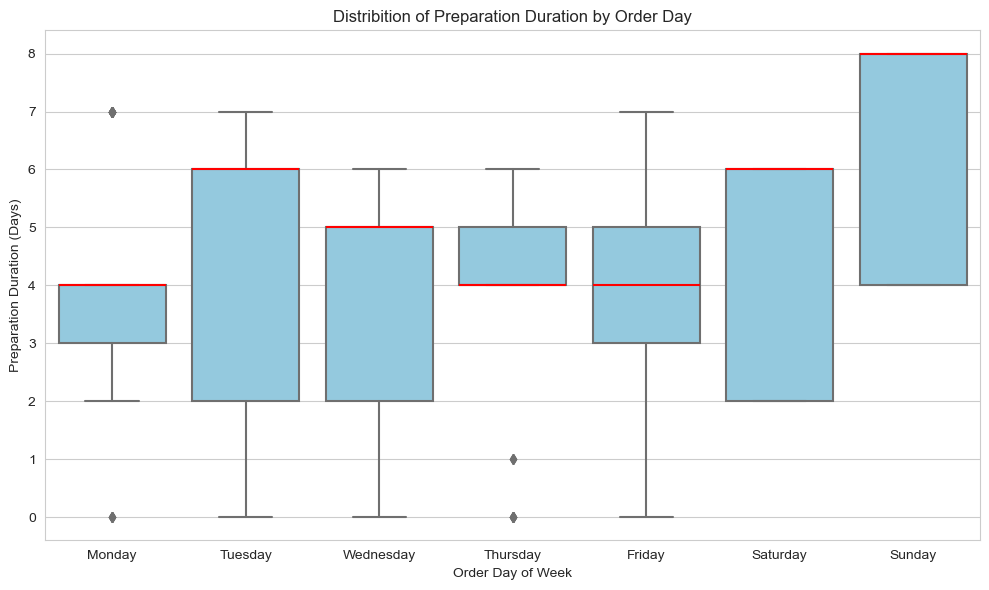

In [31]:
sns.set_style('whitegrid')
custom_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 6))
sns.boxplot(x = 'weekday',
            y = 'preparation_duration',
            data = preparation_df,
            order = custom_order,
            color = 'skyblue',
            medianprops = dict(color = 'red'))
plt.title('Distribition of Preparation Duration by Order Day')
plt.xlabel('Order Day of Week')
plt.ylabel('Preparation Duration (Days)')
#plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

Calculate the mean Preparation Duration.

In [32]:
mean_preparation_days = preparation_df['preparation_duration'].mean()

mean_preparation_days

4.157894736842105

**=> 4 days and ca. 4 hours**  
That's way more than the claimed 2 days preparation duration!

---

### 2. **Ready to Ship to on Truck**: Duration of process from "Ready to Ship" to "on Truck" (1 day for normal, 0 days for express):
merge 'order_process_data_df' and 'interndata_study_df'

In [33]:
readytoship_truck_df = pd.merge(order_process_data_df, interndata_study_df,
                                on = 'order_id',
                                how = 'inner')

In [34]:
readytoship_truck_df.columns

Index(['order_id', 'on_truck_scan_date', 'ship_mode', 'ready_to_ship_date',
       'pickup_date'],
      dtype='object')

No columns to delete.

In [35]:
readytoship_truck_df.sample(10)

,order_id,on_truck_scan_date,ship_mode,ready_to_ship_date,pickup_date
161,CA-2020-124674,2020-11-25,Standard Processing,2020-11-23,2020-11-25
146,CA-2020-131254,2020-11-23,Express,2020-11-23,2020-11-23
203,CA-2020-142090,2020-12-09,Standard Processing,2020-12-07,2020-12-09
94,CA-2020-159135,2020-11-12,Standard Processing,2020-11-09,2020-11-12
134,CA-2020-121468,2020-11-20,Express,2020-11-20,2020-11-20
106,US-2020-136707,2020-11-16,Express,2020-11-16,2020-11-16
85,CA-2020-125290,2020-11-12,Standard Processing,2020-11-10,2020-11-12
142,CA-2020-133620,2020-11-20,Standard Processing,2020-11-18,2020-11-20
32,US-2019-118780,2019-09-18,Standard Processing,2019-09-16,2019-09-18
47,CA-2019-168557,2019-09-25,Standard Processing,2019-09-23,2019-09-25


Extract the weekday name from the date column.

In [36]:
readytoship_truck_df['weekday'] = readytoship_truck_df['on_truck_scan_date'].dt.day_name()

readytoship_truck_df.sample(10)

,order_id,on_truck_scan_date,ship_mode,ready_to_ship_date,pickup_date,weekday
137,US-2020-153633,2020-11-20,Standard Processing,2020-11-18,2020-11-20,Friday
76,CA-2020-154732,2020-11-09,Express,2020-11-09,2020-11-09,Monday
12,US-2019-147711,2019-09-11,Standard Processing,2019-09-09,2019-09-11,Wednesday
194,CA-2020-155607,2020-12-02,Standard Processing,2020-11-30,2020-12-02,Wednesday
22,CA-2019-117604,2019-09-11,Standard Processing,2019-09-09,2019-09-11,Wednesday
56,US-2019-134488,2019-10-02,Standard Processing,2019-10-01,2019-10-02,Wednesday
173,US-2020-161193,2020-11-27,Standard Processing,2020-11-26,2020-11-27,Friday
127,CA-2020-160514,2020-11-18,Standard Processing,2020-11-16,2020-11-18,Wednesday
115,CA-2020-161739,2020-11-18,Standard Processing,2020-11-16,2020-11-18,Wednesday
119,CA-2020-123624,2020-11-18,Standard Processing,2020-11-17,2020-11-18,Wednesday


No convertion to datetime needed (see below).

In [37]:
readytoship_truck_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            204 non-null    object        
 1   on_truck_scan_date  204 non-null    datetime64[ns]
 2   ship_mode           204 non-null    object        
 3   ready_to_ship_date  204 non-null    datetime64[ns]
 4   pickup_date         204 non-null    datetime64[ns]
 5   weekday             204 non-null    object        
dtypes: datetime64[ns](3), object(3)
memory usage: 9.7+ KB


Calculate the duration of the process from 'Ready to Ship' to 'on Truck' and print it in a new column.

In [38]:
readytoship_truck_df['ship_to_truck'] = (readytoship_truck_df['on_truck_scan_date']
                                            - readytoship_truck_df['ready_to_ship_date']
                                            ).dt.days

readytoship_truck_df.sample(10)

,order_id,on_truck_scan_date,ship_mode,ready_to_ship_date,pickup_date,weekday,ship_to_truck
14,CA-2019-102981,2019-09-11,Standard Processing,2019-09-09,2019-09-11,Wednesday,2
5,US-2019-101616,2019-09-06,Express,2019-09-06,2019-09-06,Friday,0
24,CA-2019-164350,2019-09-13,Standard Processing,2019-09-12,2019-09-13,Friday,1
131,CA-2020-152142,2020-11-18,Standard Processing,2020-11-16,2020-11-18,Wednesday,2
123,CA-2020-104640,2020-11-18,Standard Processing,2020-11-16,2020-11-18,Wednesday,2
187,US-2020-128118,2020-12-02,Standard Processing,2020-12-01,2020-12-02,Wednesday,1
86,CA-2020-122504,2020-11-12,Standard Processing,2020-11-09,2020-11-12,Thursday,3
2,CA-2019-129630,2019-09-04,Express,2019-09-04,2019-09-04,Wednesday,0
46,CA-2019-142370,2019-09-25,Standard Processing,2019-09-23,2019-09-25,Wednesday,2
203,CA-2020-142090,2020-12-09,Standard Processing,2020-12-07,2020-12-09,Wednesday,2


In [39]:
readytoship_truck_df['ship_to_truck'].unique()

array([1, 0, 3, 2])

Filter for standard processing.

In [40]:
standard_readytoship_truck_df = readytoship_truck_df[readytoship_truck_df['ship_mode'] == 'Standard Processing']

standard_readytoship_truck_df.sample(10)

,order_id,on_truck_scan_date,ship_mode,ready_to_ship_date,pickup_date,weekday,ship_to_truck
40,CA-2019-130225,2019-09-18,Standard Processing,2019-09-17,2019-09-18,Wednesday,1
102,CA-2020-152912,2020-11-13,Standard Processing,2020-11-12,2020-11-13,Friday,1
71,CA-2020-104136,2020-11-06,Standard Processing,2020-11-05,2020-11-06,Friday,1
58,CA-2019-141551,2019-10-02,Standard Processing,2019-09-30,2019-10-02,Wednesday,2
185,CA-2020-166436,2020-12-02,Standard Processing,2020-11-30,2020-12-02,Wednesday,2
78,CA-2020-130834,2020-11-09,Standard Processing,2020-11-06,2020-11-09,Monday,3
116,CA-2020-148985,2020-11-18,Standard Processing,2020-11-16,2020-11-18,Wednesday,2
101,CA-2020-161018,2020-11-13,Standard Processing,2020-11-11,2020-11-13,Friday,2
63,CA-2019-106243,2019-10-07,Standard Processing,2019-10-04,2019-10-07,Monday,3
25,CA-2019-149223,2019-09-13,Standard Processing,2019-09-11,2019-09-13,Friday,2


Calculate the mean Preparation Duration for Standard Processing.

In [41]:
mean_standard_days = standard_readytoship_truck_df['ship_to_truck'].mean()

mean_standard_days

1.9867549668874172

**=> ca. 2 days**  
That's more than the claimed 1 day.

---

### 3. **Ready to Ship to on Truck Express**: Efficacy of "Express Processing"; the order ought to be on the truck on the ready to ship day

In [42]:
express_readytoship_truck_df = readytoship_truck_df[readytoship_truck_df['ship_mode'] == 'Express']

express_readytoship_truck_df.sample(10)

,order_id,on_truck_scan_date,ship_mode,ready_to_ship_date,pickup_date,weekday,ship_to_truck
98,US-2020-116491,2020-11-13,Express,2020-11-13,2020-11-13,Friday,0
68,US-2020-105998,2020-11-06,Express,2020-11-05,2020-11-06,Friday,1
0,CA-2019-116540,2019-09-03,Express,2019-09-02,2019-09-03,Tuesday,1
109,CA-2020-136308,2020-11-16,Express,2020-11-16,2020-11-16,Monday,0
64,US-2020-168116,2020-11-04,Express,2020-11-04,2020-11-04,Wednesday,0
41,CA-2019-158610,2019-09-23,Express,2019-09-23,2019-09-23,Monday,0
1,CA-2019-129847,2019-09-04,Express,2019-09-04,2019-09-04,Wednesday,0
100,CA-2020-134915,2020-11-13,Express,2020-11-12,2020-11-13,Friday,1
81,CA-2020-162096,2020-11-12,Express,2020-11-10,2020-11-12,Thursday,2
154,CA-2020-137505,2020-11-25,Express,2020-11-24,2020-11-25,Wednesday,1


Calculate the mean Preparation Duration for Express Processing.

In [43]:
mean_express_days = express_readytoship_truck_df['ship_to_truck'].mean()

mean_express_days

0.39622641509433965

**=> ca. 10 hours**  
Less than the claimed 1 day!

---

### 4. **Order Delivery**: From "On Truck Scan" to "Arrival Scan Date":
merge campaign_data_df and order_process_data_df

In [44]:
order_delivery_df = pd.merge(campaign_data_df, order_process_data_df,
                             on = 'order_id',
                             how = 'inner')

In [45]:
order_delivery_df.columns

Index(['order_id', 'arrival_scan_date', 'on_truck_scan_date', 'ship_mode'], dtype='object')

No columns to delete.

### 5. **Order Delivery 2**: From "Pickup Date" to "Arrival Scan Date":
merge campaign_data_df and interndata_study_df

### 6. **Order Delivery total**: Get an image of the whole delivery process duration, from 'Order Date' to 'Arrival Scan Date':
merge orders_df and order_process_data_df